# Search Tree => Similar Words

In [6]:
csv_path = r'D:\学习的一些文件\Data_Learning\sqlResult_1558435.csv'

In [7]:
import pandas as pd

In [8]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [5]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [9]:
content = content.fillna('')

In [10]:
news_content = content['content'].tolist()

In [11]:
import jieba
def cut(string): return ' '.join(jieba.cut(string))

In [12]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\13081\AppData\Local\Temp\jieba.cache
Loading model cost 0.554 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [13]:
import re
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [14]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [15]:
news_content = [token(n) for n in news_content]

In [16]:
news_content = [' '.join(n) for n in news_content]

In [17]:
news_content = [cut(n) for n in news_content]

In [18]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [19]:
with open('news-sentences-cut.txt', 'w',encoding='utf-8') as f:
    for n in news_content:
        f.write(n + '\n')

In [23]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [24]:
L = LineSentence('news-sentences-cut.txt')

In [25]:
type(L)

gensim.models.word2vec.LineSentence

In [26]:
news_word2ve= Word2Vec(L, size=35, workers=8)

D:\Software\Anoconda_Python3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
news_word2ve.most_similar('葡萄牙', topn=20)

D:\Software\Anoconda_Python3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('意大利', 0.8773441910743713),
 ('克罗地亚', 0.8480861186981201),
 ('摩洛哥', 0.814822793006897),
 ('乌拉圭', 0.8025262355804443),
 ('捷克', 0.8001495003700256),
 ('西班牙', 0.7992589473724365),
 ('拉脱维亚', 0.7885867357254028),
 ('里斯本', 0.787035346031189),
 ('比利时', 0.7857558727264404),
 ('比什凯克', 0.7844553589820862),
 ('巴塞罗那', 0.7796788811683655),
 ('马德里', 0.7795749306678772),
 ('瑞典', 0.7700682878494263),
 ('苏格兰', 0.7610818147659302),
 ('丹麦', 0.7600873112678528),
 ('多哈', 0.7596850395202637),
 ('科特迪瓦', 0.7592431306838989),
 ('索', 0.7567359805107117),
 ('秘鲁', 0.7562570571899414),
 ('奥地利', 0.7559134364128113)]

In [28]:
from collections import defaultdict

In [29]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [30]:
len(news_word2ve.wv.vocab)

97927

In [31]:
related_words = get_related_words(['说', '表示'], news_word2ve)

seen length : 0
seen length : 50
seen length : 50
seen length : 50
seen length : 50
seen length : 50


D:\Software\Anoconda_Python3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 100
seen length : 100
seen length : 150
seen length : 150
seen length : 200
seen length : 250
seen length : 300
seen length : 350
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen lengt

In [32]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('指出', 91),
 ('坦言', 90),
 ('表示', 86),
 ('说', 84),
 ('认为', 80),
 ('所说', 76),
 ('透露', 75),
 ('告诉', 66),
 ('看来', 64),
 ('提到', 61),
 ('称', 59),
 ('介绍', 54),
 ('强调', 47),
 ('明说', 41),
 ('特别强调', 40),
 ('深有体会', 38),
 ('中说', 37),
 ('文说', 35),
 ('称赞', 35),
 ('问', 34),
 ('提及', 31),
 ('申明', 30),
 ('建议', 30),
 ('呼吁', 30),
 ('普遍认为', 29),
 ('说道', 28),
 ('相信', 27),
 ('写信给', 27),
 ('中称', 25),
 ('直言', 24),
 ('声称', 24),
 ('写道', 23),
 ('表明', 19),
 ('说明', 18),
 ('如是说', 17),
 ('解释', 17),
 ('推测', 16),
 ('八面玲珑', 15),
 ('重申', 15),
 ('回答', 15),
 ('知情', 14),
 ('这篇大', 14),
 ('怼', 14),
 ('问道', 12),
 ('形容', 12),
 ('分析', 11),
 ('眼中', 11),
 ('还称', 11),
 ('引用', 11),
 ('觉得', 10),
 ('苏西洛', 10),
 ('董', 10),
 ('一贯', 10),
 ('阐述', 10),
 ('确信', 10),
 ('感慨', 10),
 ('暗示', 10),
 ('指责', 10),
 ('批评', 10),
 ('来说', 9),
 ('而言', 9),
 ('估计', 9),
 ('地说', 8),
 ('见到', 8),
 ('看到', 8),
 ('先对', 8),
 ('接受', 8),
 ('具名', 8),
 ('证实', 8),
 ('一家之言', 8),
 ('宣称', 8),
 ('志军', 8),
 ('祁', 8),
 ('谈论', 8),
 ('特别感谢', 8),
 ('作答', 8),
 ('给出', 8),
 ('抛出',

# TFIDF Key words

In [33]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [34]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [35]:
document_frequency('的')

70342

In [36]:
import math

In [37]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [38]:
idf('的') < idf('小米')

True

In [39]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [40]:
'是等' in news_content[0]

False

In [41]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [42]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [43]:
tf('银行', news_content[11])

6

In [44]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [45]:
get_keywords_of_a_ducment(news_content[101])

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('但远', 4.9523613237924735),
 ('16992', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('后移', 4.253391319456455),
 ('前十强', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('相当规模', 4.17421007340883),
 ('更新改造', 4.17421007340883),
 ('机械类', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

In [48]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[101])

# Wordcloud

In [1]:
import wordcloud

In [2]:
wc = wordcloud.WordCloud('D:\学习的一些文件\Data_Learning\SourceHanSerifSC-Regular.otf')

In [20]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [21]:
import matplotlib.pyplot as plt

In [22]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [49]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

In [50]:
%matplotlib inline

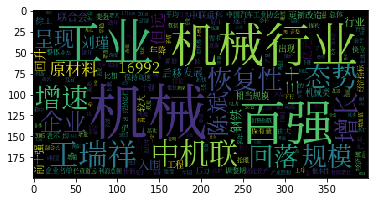

In [51]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [52]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[4])

In [53]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('南坪', 23.465811831805492),
 ('交警', 15.805787932978273),
 ('坂田', 13.953993984385477),
 ('黄衣', 13.050903997393533),
 ('巡防', 11.328810194210376),
 ('了', 11.012005636840637),
 ('轻生', 10.382998889874603),
 ('护栏', 9.32178985133465),
 ('裸身', 9.302662656256985),
 ('坂雪岗', 9.302662656256985),
 ('她', 9.285022817533253),
 ('约会', 9.267115391016052),
 ('深圳', 9.139285494790956),
 ('发现', 8.685059498920872),
 ('蜀黍', 8.214526567556433),
 ('网友', 8.126865289542744),
 ('突然', 8.047379355439626),
 ('内裤', 7.746360155489698),
 ('十多分钟', 7.746360155489698),
 ('着', 7.69376356788892),
 ('铁骑', 7.496482682273098),
 ('大概', 7.478906508099729),
 ('缓慢', 7.465405004419699),
 ('龙岗', 7.181266975549762),
 ('快速路', 7.108842630240872),
 ('大道', 6.863158044709045),
 ('环城', 6.816586558884396),
 ('辅警', 6.7921176460503725),
 ('往前走', 6.722593433531949),
 ('走', 6.658635364608071),
 ('视频', 6.65823837544899),
 ('市民', 6.50820380832565),
 ('精神病', 6.4895822953890745),
 ('主干道', 6.4

In [54]:
from PIL import Image

In [56]:
import numpy as np

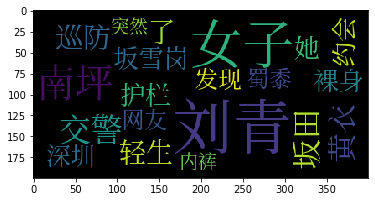

In [57]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

# TFIDF Vectorizezd

In [5]:
with open(r'D:\Git_repositories\Learning-NLP\Assignments\lesson-05\news-sentences-cut.txt',encoding = 'utf-8') as f:
    news_content = [i.strip() for i in f.readlines()]

In [6]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorized = TfidfVectorizer(max_features=10000)

In [9]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [10]:
X = vectorized.fit_transform(sub_samples)

In [11]:
X.shape

(50000, 10000)

In [12]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982